# Dividir el dataset en conjunto de entrenamiento y de testing

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv("../datasets/ads/Advertising.csv")


In [29]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
a = np.random.randn(len(data))

(array([ 4., 15., 14., 31., 42., 31., 34., 13., 11.,  5.]),
 array([-2.26692714, -1.82163207, -1.37633701, -0.93104194, -0.48574688,
        -0.04045181,  0.40484325,  0.85013832,  1.29543338,  1.74072845,
         2.18602351]),
 <BarContainer object of 10 artists>)

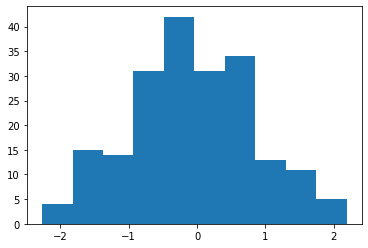

In [18]:
plt.hist(a)

In [19]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [20]:
len(training), len(testing)

(170, 30)

In [21]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data = training).fit()

In [22]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     760.0
Date:                Mon, 17 May 2021   Prob (F-statistic):           1.36e-84
Time:                        18:15:08   Log-Likelihood:                -327.09
No. Observations:                 170   AIC:                             660.2
Df Residuals:                     167   BIC:                             669.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9238      0.317      9.226      0.000       2.298       3.549
TV             0.0460      0.002     30.327      0.000       0.043       0.049
Radio          0.1883      0.009     21.531      0.000       0.171       0.206
==============================================================================
Omnibus:                       65.815   Durbin-Watson:                   2.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.923
Skew:                          -1.571   Prob(JB):                     6.37e-44
Kurtosis:                       7.268   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.9238 + 0.0460 * TV + 0.1883 * Radio

## Validación del modelo con el conjunto de testing


In [23]:
sales_pred = lm.predict(testing)
sales_pred

2      12.358285
6      11.746844
12     10.628542
22      6.525331
23     16.615738
27     17.121292
47     21.781771
53     20.028950
60      5.763255
68     19.030571
91      4.522838
92     19.253445
94     10.504063
97     15.389827
103    14.812415
110    14.862495
114    15.335880
128    22.291690
129     7.927006
131    15.678314
132     8.432083
156    15.437259
158    10.410449
159    12.451205
169    18.007444
173    12.012967
179    12.430121
181    13.999217
182     6.584236
199    15.227833
dtype: float64

In [24]:
SSD = sum((testing["Sales"] - sales_pred)**2)
SSD

90.68004842391328

In [26]:
RSE = np.sqrt(SSD/(len(testing)-2-1))   #ERROR STANDARD DE LOS RESIDUOS
RSE


1.8326266155430537

In [30]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error


0.13848563845413506